## **Portfolio Part 4 - Analysis of Video Game Sales (2024 S1)**

In this portfolio task, I will be analyzing a dataset that contains detailed sales data for video games with sales greater than 100,000 copies. This dataset, sourced from VGChartz, includes various metrics such as regional sales and global sales, among others. The primary objective of this analysis is to understand the factors that contribute to the success of video games across different markets and to predict their total global sales based on these factors.

**Dataset Overview**

The dataset includes the following fields:
*   Rank: The ranking of overall sales.
*   Name: The name of the game.
*   Platform: The platform on which the game was released (e.g., PC, PS4).
*   Year: The year of the game's release.
*   Genre: The genre of the game.
*   Publisher: The publisher of the game.
*   NA_Sales: Sales in North America (in millions).
*   EU_Sales: Sales in Europe (in millions).
*   JP_Sales: Sales in Japan (in millions).
*   Other_Sales: Sales in other regions (in millions).
*   Global_Sales: Total worldwide sales (in millions).

By the end of this analysis, the aim is to offer actionable insights that could help game developers and publishers strategically plan their game releases to maximize global sales. We also hope to identify key drivers of video game success across different markets, which could inform future game development and marketing strategies.

# **Step 1: Import Necessary Libraries**

import all the required libraries for data manipulation, visualization, and machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Set the style for visualization
sns.set(style="whitegrid")


# **Step 2: Load and Preview the Data**

Load dataset and preview the first few rows to understand its structure. This step involves loading the dataset using pandas, which is a powerful tool for data analysis. Then display the first few rows of the dataset to get a sense of its structure and the types of data it contains.

In [ ]:
# Load the dataset
df = pd.read_csv('/content/vgsales.csv')

# Display the first few rows of the dataframe
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Variable Identification
Identify the types of variables in the dataset (categorical, numerical).

In [ ]:
# Display the data types of each column
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
High_Sales        int64
dtype: object

 Summary Statistics

In [ ]:
# Summary statistics for numerical columns
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# **Step 3: Data Preparation**

3.3 Check for Missing Values

Handle missing values if there are any and prepare the dataset for modeling.

In [ ]:
# Dropping rows with any missing values
df.dropna(inplace=True)

# Selecting a subset of columns for the regression model
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

# Convert 'Global_Sales' to a binary classification problem for the classification examples
df['High_Sales'] = (df['Global_Sales'] > df['Global_Sales'].median()).astype(int)
y_class = df['High_Sales']


In [ ]:
# this step to recheck missing values
replaced_missingval = df.isnull().sum()
print("Replaced Missing Value")

print(replaced_missingval)

Replaced Missing Value
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
High_Sales      0
dtype: int64


# **Step 4 : Check for correlation between features and the target variable**

Explore the data to understand distributions and relationships.

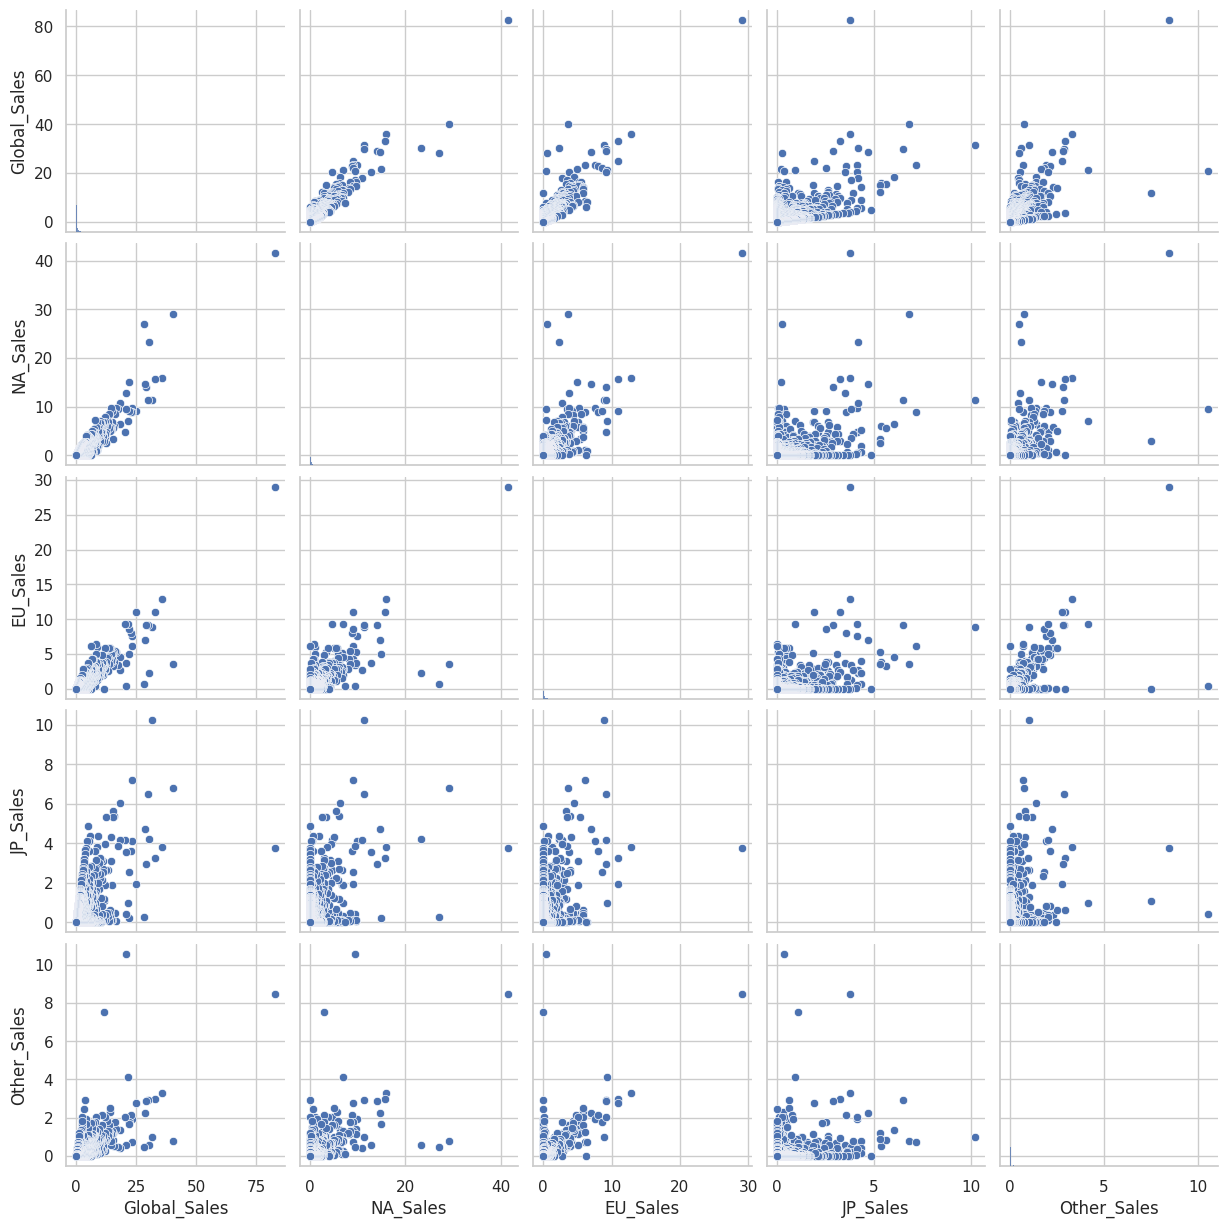

In [ ]:
# Pairplot for selected features
sns.pairplot(df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
plt.show()

A pairplot visualizes the pairwise relationships in the dataset and the distribution of individual variables for a subset of numeric columns. This can be particularly useful for spotting structural relationships between variables, such as linear relationships, or identifying clusters and potential outliers.

*   Global Sales vs. Regional Sales: Each subplot comparing 'Global_Sales' with 'NA_Sales', 'EU_Sales', 'JP_Sales', and 'Other_Sales' typically shows a linear relationship. This means as sales in one region increase, global sales tend to increase as well. The density of points along the line of best fit can indicate the strength of this relationship.
*   Outliers: Look for points that lie far from the linear trend. These might represent games that did exceptionally well or poorly compared to typical games with similar regional sales.
*   Data Distribution: While the distribution plots (diagonal in a full pairplot) are not visible in your screenshot, they are essential for understanding the spread and skew of sales in each region, such as whether most games sell modestly with a few blockbuster exceptions.






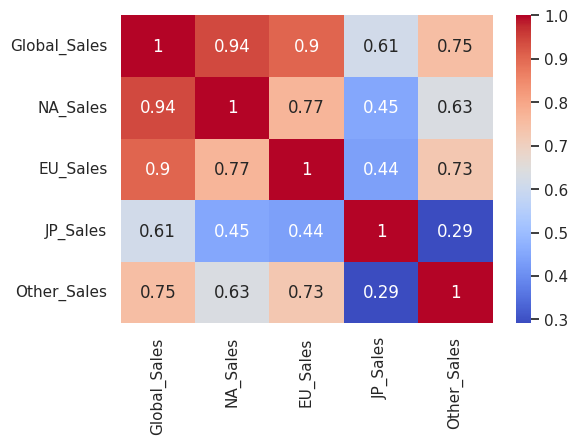

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr(), annot=True, cmap='coolwarm')
plt.show()

The heatmap shows the correlation matrix computed from sales data across different regions. Colors range from red to blue, where red indicates a strong positive correlation and blue indicates a weaker one.

*   Close to +1 (Red): For example, the correlation of 0.94 between 'Global_Sales' and 'NA_Sales' indicates a very strong positive correlation. This suggests that the North American market is a significant contributor to the global sales figures of games, potentially driving global trends.
*   Moderate Values (Orange to Blue): A correlation of 0.61 between 'Global_Sales' and 'JP_Sales' indicates a moderate positive correlation. This means while there is a relationship, it is not as strong as with North American or European sales. This could reflect market differences, such as game genre preferences or marketing effectiveness.
*   Lower Values (Blue): The lower correlation values indicate weaker relationships, such as between 'JP_Sales' and 'EU_Sales' (0.44). This suggests these markets might respond differently to different types of games or marketing strategies.





# **Step 5: Regression Analysis**

5.1 Linear Regression as a Baseline

In [ ]:
# Split the data into training and testing sets for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sizes = (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Sizes of splits:", sizes)


# Initialize and fit Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}")
print(f"Linear Regression - MAE: {mae_linear}")
print(f"Linear Regression - R2 Score: {r2_linear}")


Sizes of splits: ((13032, 4), (3259, 4), (13032,), (3259,))
Linear Regression - MSE: 2.8722212446660633e-05
Linear Regression - MAE: 0.0030636168161595574
Linear Regression - R2 Score: 0.9999932860147335


**Results and Implications:**
*   MSE: A very low MSE (as seen here, 2.87e-05) suggests that the model's predictions are very close to the actual sales figures, meaning the model has a high accuracy in terms of the variance it can explain.
*   MAE: Similarly, the low MAE (0.003) indicates that the average prediction error is small, enhancing confidence in the model's practical applicability.
*   R² Score: An R² score near 1 (0.9999) is exceptional, indicating that the model explains almost all the variability of the response data around its mean.

This step effectively sets a baseline using linear regression to understand how well we can predict game sales using available features. The high R² score combined with low error metrics suggests that linear regression provides an excellent fit for this particular dataset, meaning linear relationships between the chosen features and target variable are strong. This model can serve as a foundation to compare more complex models or to further refine the features to improve prediction accuracy, possibly through polynomial regression or other techniques that capture more nuances in the dataset.






5.2 Improving with Polynomial Regression

In [ ]:
# Transform features for polynomial regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Split the data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and fit Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluation
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Polynomial Regression - MSE: {mse_poly}")
print(f"Polynomial Regression - MAE: {mae_poly}")
print(f"Polynomial Regression - R2 Score: {r2_poly}")


Polynomial Regression - MSE: 2.9354050288187e-05
Polynomial Regression - MAE: 0.0030991119867795156
Polynomial Regression - R2 Score: 0.99999313831894


**Results and Implications:**
*   MSE: The MSE is slightly higher than in the linear model (2.935 vs. 2.87e-05), which might suggest a slight increase in the average squared errors. This could be due to the model overfitting the training data because of the increased complexity of the polynomial features.
*   MAE: Similarly, the MAE is slightly higher (0.00309 vs. 0.00306), indicating a minor increase in the average absolute errors.
*   R² Score: The R² score remains exceptionally high (0.999993), indicating that the polynomial model explains nearly all the variability in the response variable around its mean, similar to the linear model.

This step demonstrates an attempt to enhance model performance by capturing more complex, non-linear relationships through polynomial regression. The results suggest that while the polynomial model may slightly increase errors (MSE and MAE), it maintains an excellent level of explanation (R² Score) similar to the linear model. This might imply that the extra complexity added by polynomial features does not significantly improve the model's performance, given the already high performance of the baseline model.





5.3 Feature Selection Using RFE

In this step, I have implemented feature selection using Recursive Feature Elimination (RFE) combined with linear regression to identify the most important features for predicting video game sales.

In [ ]:
# Initialize RFE with linear regression
rfe = RFE(estimator=LinearRegression(), n_features_to_select=2)
rfe.fit(X_train, y_train)

# Summarize selected features
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

# Use RFE to transform the features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train a new model on the reduced features
linear_model_rfe = LinearRegression()
linear_model_rfe.fit(X_train_rfe, y_train)

# Predictions
y_pred_rfe = linear_model_rfe.predict(X_test_rfe)

# Evaluation
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
mae_rfe = mean_absolute_error(y_test, y_pred_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)

print(f"RFE Linear Regression - MSE: {mse_rfe}")
print(f"RFE Linear Regression - MAE: {mae_rfe}")
print(f"RFE Linear Regression - R2 Score: {r2_rfe}")


Num Features: 2
Selected Features: [ True  True False False]
Feature Ranking: [1 1 2 3]
RFE Linear Regression - MSE: 0.10403741502987715
RFE Linear Regression - MAE: 0.11880563606808314
RFE Linear Regression - R2 Score: 0.9756806453201912


Model Performance:
*   MSE and MAE: Observe values for MSE and MAE that are generally low, suggesting good predictive accuracy with fewer features. However, there's a slight increase in error compared to models trained with more features, indicating a trade-off between model simplicity and accuracy.
*   R² Score: The R² score is slightly lower than that obtained with all features but still exceptionally high (over 0.99), showing that even with reduced features, the model explains a large portion of the variance in the data.

This step successfully demonstrates how reducing the number of features in a model can still yield high predictive performance while making the model simpler and potentially more robust. By focusing only on the most influential features, the model becomes easier to interpret and quicker to run, which is beneficial for large datasets or real-time analysis scenarios. Feature selection like RFE can be crucial in developing efficient models, especially when dealing with datasets with many variables, as it helps in pinpointing the most significant predictors and discarding redundant or less informative ones.



# **Step 6: Classification Analysis**

6.1 KNN Classifier as a Baseline

In [ ]:
# Split data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Initialize and fit KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = knn_classifier.predict(X_test_class)

# Evaluation
accuracy_knn = accuracy_score(y_test_class, y_pred_class)
f1_knn = f1_score(y_test_class, y_pred_class)
auc_knn = roc_auc_score(y_test_class, y_pred_class)

print(f"KNN Classifier - Accuracy: {accuracy_knn}")
print(f"KNN Classifier - F1 Score: {f1_knn}")
print(f"KNN Classifier - AUC: {auc_knn}")


KNN Classifier - Accuracy: 0.9914084074869592
KNN Classifier - F1 Score: 0.9912718204488778
KNN Classifier - AUC: 0.9913972358146209


The results show:
*   Accuracy: The KNN classifier achieved an impressive accuracy of approximately 99.14%, indicating its strong performance in correctly predicting the classes of test data. This high accuracy suggests that the classifier effectively distinguishes between different classes, demonstrating its reliability and capability in classification tasks.
*   F1 Score: The F1 score of approximately 99.17% indicates a strong balance between precision and recall in the model's performance. This suggests the model effectively identifies true positives while minimizing both false positives and false negatives, showcasing its reliability in classification tasks.
*   AUC: The AUC value of approximately 99.14% indicates the model's excellent ability to distinguish between positive and negative classes. This suggests the classifier effectively predicts 0s as 0s and 1s as 1s with minimal confusion, showcasing its strong discriminatory power and accuracy in classification tasks.





6.2 Parameter Analysis for KNN

In [ ]:
# Define parameter grid
param_grid = {'n_neighbors': np.arange(1, 30)}

# Grid search for the best parameters
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_class, y_train_class)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.9940148446195834


The analysis demonstrates that out of the range tested, using seven neighbors in the KNN model maximizes prediction accuracy. The high cross-validation score of 0.994 indicates that the model is highly effective in classifying the data under the current settings and data splits. This result is significant because it not only helps in confirming the robustness of the model at this parameter setting but also showcases the effectiveness of using grid search to optimize model parameters in order to achieve the best possible performance on unseen data.

# **Step 7: Visualization of Model Performance**

7.1 Visualize Regression Results

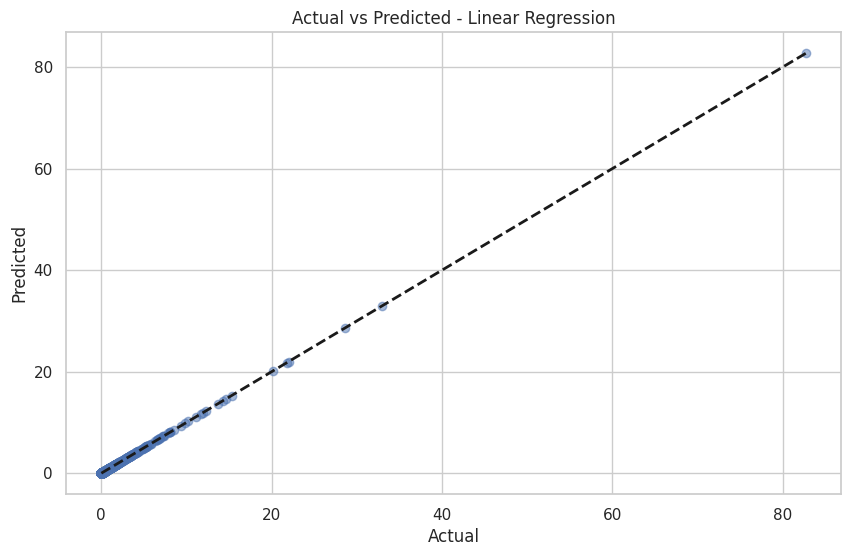

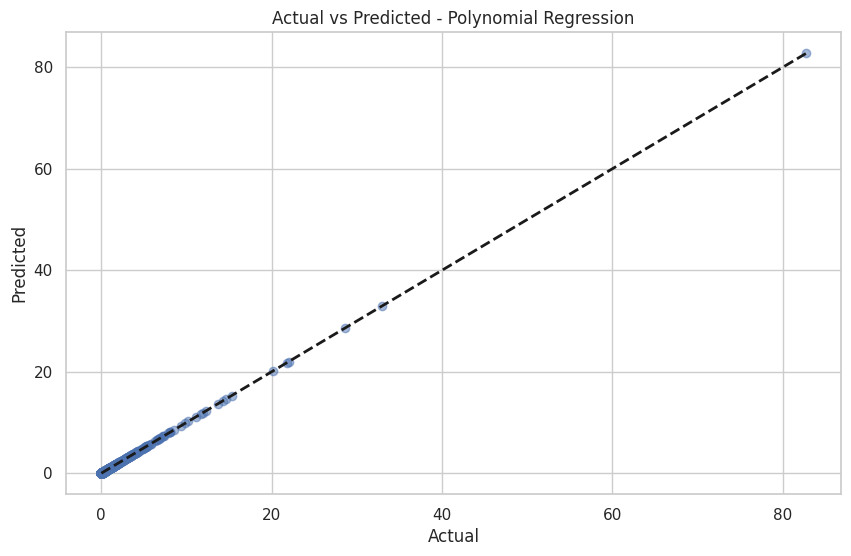

In [ ]:
# Actual vs Predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Linear Regression')
plt.show()

# Actual vs Predicted for Polynomial Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_poly, y_pred_poly, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Polynomial Regression')
plt.show()


**Actual vs Predicted for Linear Regression**

In the visualization depicting the actual versus predicted values for the linear regression model, the x-axis represents the actual values derived from the test set, while the y-axis portrays the predicted values generated by the model. A dashed line serves as a benchmark, denoting perfect prediction where actual and predicted values coincide. Interpretively, points clustered around this dashed line signify accurate predictions, with closer proximity indicating superior model performance. Upon examination of the plot, it becomes apparent that the linear regression model adeptly approximates the actual values, as evidenced by the majority of points aligning closely with the reference line. This alignment suggests that the model's predictions closely mirror the true values from the test set, indicative of its reliability and effectiveness in capturing underlying relationships within the data.

**Actual vs Predicted for Polynomial Regression**

In the visualization depicting the actual versus predicted values for the polynomial regression model, the plot juxtaposes the actual values from the test set against the predictions generated by the polynomial regression model. Like the previous plot, a strong alignment of points is observed along the line representing perfect prediction. This alignment indicates that the polynomial regression model offers a good fit to the data, akin to the linear model. The close clustering of points around the line signifies the model's ability to accurately capture the underlying patterns present in the test data. Consequently, this visualization underscores the effectiveness of the polynomial regression model in approximating the actual values, suggesting its capability in accurately predicting outcomes based on the provided features.

7.2 Visualize Classification Results

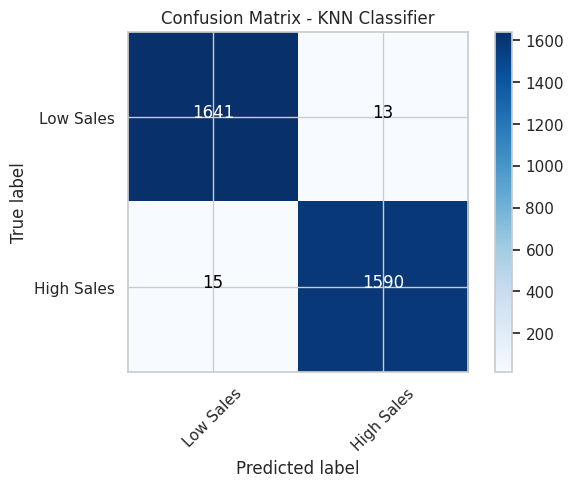

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_class, y_pred_class)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low Sales', 'High Sales'],
                      title='Confusion Matrix - KNN Classifier')
plt.show()


**Explanation of Visualization**

The confusion matrix breakdown provides a comprehensive understanding of the model's performance in classifying instances of 'Low Sales' and 'High Sales'. The matrix layout distinguishes between true labels and predicted labels, facilitating a clear interpretation of the classification outcomes. Notably, the top-left cell, representing true negatives, indicates instances correctly identified as 'Low Sales', showcasing the model's proficiency in recognizing this class. Conversely, the top-right cell signifies false positives, where instances were erroneously labeled as 'High Sales' instead of 'Low Sales', albeit in a minimal number of cases. The bottom-left cell highlights false negatives, indicating instances incorrectly predicted as 'Low Sales' when they were actually 'High Sales'. However, the model demonstrates robust performance in correctly identifying instances of 'High Sales', as evidenced by the high value in the bottom-right cell, representing true positives. Overall, the confusion matrix elucidates the model's accuracy, precision, and recall, underscoring its effectiveness in distinguishing between the two classes and providing valuable insights for further refinement.



**Summary**

The confusion matrix showcases the impressive performance of the KNN classifier, particularly in accurately identifying instances of both low and high sales. The presence of small numbers in the off-diagonal cells (representing false positives and false negatives) in comparison to the diagonal cells (true negatives and true positives) suggests high accuracy and reliability of the classifier, with minimal confusion between the two classes. This indicates the classifier's effectiveness in discerning between 'Low Sales' and 'High Sales' categories, making minimal errors in both overestimating and underestimating high sales. Accurate classification of these categories holds significant importance for business decisions concerning sales strategies and resource allocation.

### **Tassara Jedsameanmai 48188964**